### Distribution Analysis

Distribution analysis is a key step in data exploration, helping you understand how data points are spread across a range of values.

**Visual Inspection**
- **Histograms**: Create histograms to see the frequency of different values. Look for patterns like skewness, modality, and outliers.
- **Box Plots**: Use box plots to visualize the median, quartiles, and outliers. This helps identify the spread and central tendency of the data.
- **KDE Plots**: Kernel Density Estimation plots provide a smoothed representation of the probability density function. They can reveal the shape and peaks of the distribution.

**Statistical Measures**
- **Mean and Median**: Calculate the mean (average) and median (middle value) to understand the central tendency.
- **Standard Deviation and Variance**: Measure the spread of the data. A high standard deviation indicates a wider spread.
- **Skewness**: Determine the skewness of the distribution. A positive skew means the tail on the right side is longer, while a negative skew means the tail on the left side is longer.
- **Kurtosis**: Measure the "tailedness" of the distribution. A high kurtosis indicates a heavy-tailed distribution with more extreme values.

**Common Distributions**

- **Normal Distribution (Gaussian)**: Symmetrical bell-shaped curve.
- **Uniform Distribution**: All values have equal probability.
- **Poisson Distribution**: Commonly used for count data (e.g., number of occurrences in a fixed interval).
- **Binomial Distribution**: Represents the number of successes in a fixed number of Bernoulli trials.
- **Exponential Distribution**: Often used for modeling waiting times or interarrival times.
- **Log-normal Distribution**: Useful for modeling variables that are log-normally distributed.


*Features to analyze* 
- Protocol
- Timestamp 
- Flow Duration
- Total Fwd Packets 
- Total Bwd Packets 
- Total length of Fwd Packet 
- Total length of Bwd Packet
- Flow bytes/s 
- Flow Packets/s
---

In [2]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import os 
import json

import matplotlib.pyplot as plt
import seaborn as sns

**Functions**

In [4]:
def read_data(data_path: str, usecols: list) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path, usecols=usecols)
    return data


def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")

    
def kde_plot(data: pd.DataFrame, feature_name: str, save: bool, fig_size: tuple = (8, 4),
             hue: str = 'Label', fill: bool = True, palette: str = 'crest'): 
    """
    This function plots a kernel density estimation plot for distribution analysis
    """
    plt.figure(figsize=fig_size)
    # Kde plot 
    sns.kdeplot(
        data = data,
        x = feature_name, 
        hue = hue,
        fill = fill,
        common_norm = False,
        palette = palette
    )
    plt.title(f"Kernel Density Estimation Plot for {feature_name}")

    # Save plot
    if save:
        folder_name = 'kde_plots'
        file_name = f'{feature_name.strip()}_kde.png'   
        save_plot(folder_name, file_name)

    plt.show()


def remove_outliers(data: pd.DataFrame, feature_name: str):
    """
    This function removes the outliers from the data
    """ 
    p75 = data[feature_name].quantile(0.75)

    filtered_data = data[data[feature_name] <= p75]

    return filtered_data

# ... 

**Data**

In [5]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"
# Columns in this category
columns_to_read = ['Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
                    'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 
                    'Flow Bytes/s', 'Flow Packets/s', 'Label']

# Read the data
try:
    data = read_data(file_path, usecols = columns_to_read)
    print(f"Successfully read {len(data.columns)} features")
except:
    print("File not found!")
    print("[INFO] Please place the dataset.csv in the directory for use!")

Successfully read 10 features


**Analysis**

### **KDE Plot**

KDE plots can be a valuable tool for identifying the underlying probability distribution of your data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231475 entries, 0 to 3231474
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Timestamp                   object 
 2   Flow Duration               int64  
 3   Total Fwd Packet            int64  
 4   Total Bwd packets           int64  
 5   Total Length of Fwd Packet  float64
 6   Total Length of Bwd Packet  float64
 7   Flow Bytes/s                float64
 8   Flow Packets/s              float64
 9   Label                       int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 246.5+ MB


Fig saved successfully!


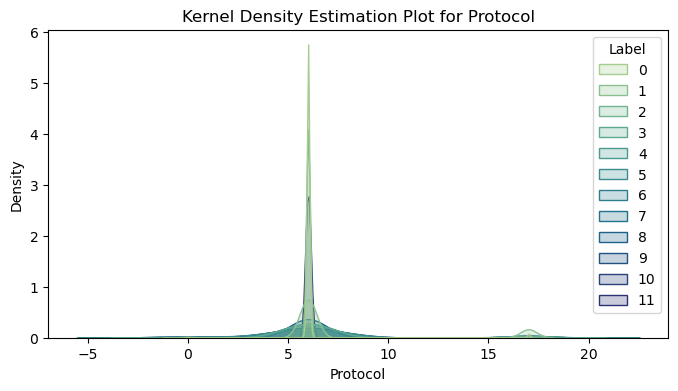

In [23]:
kde_plot(data=data, feature_name='Protocol', save=True)

> Since, Protocol consists of only three distinct values that is 0, 6 and 17 (6 being the highest in number) showing unique groups/clusters within the data and their impact on the overall target

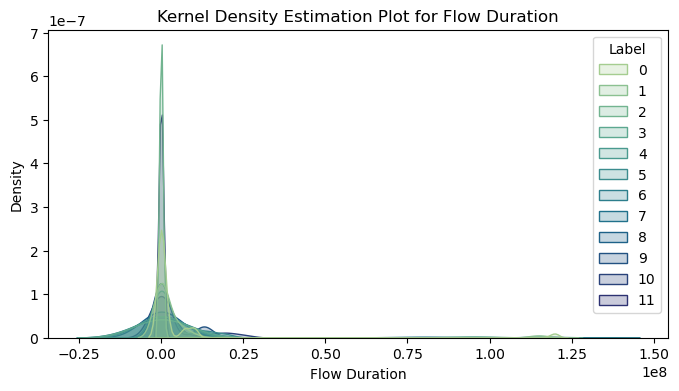

In [8]:
kde_plot(data=data, feature_name='Flow Duration', save=False)

> Multi-modal distribution: The kde plot shows multiple peaks (modes) indicating the data likely originates from multiple groups. 

> The different colored curves suggest that the feature has different distributions for each groups.

Fig saved successfully!


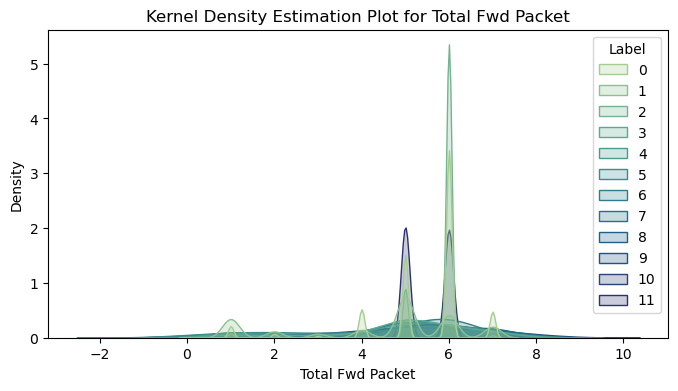

In [10]:
f_data = remove_outliers(data, 'Total Fwd Packet')
kde_plot(data=f_data, feature_name='Total Fwd Packet', save=True)

> Multi modal distribution with rightward skew

> Density concentrated around the value 6

Fig saved successfully!


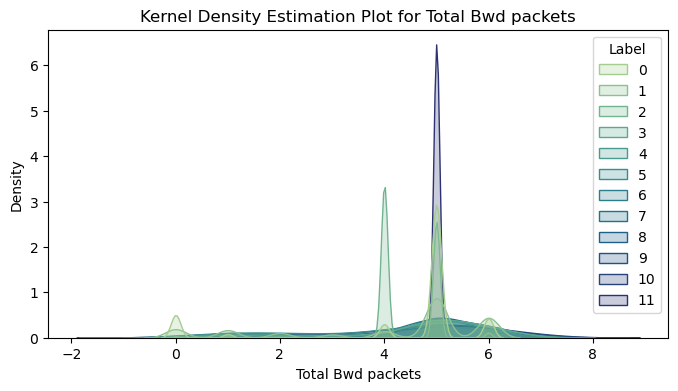

In [17]:
f_data = remove_outliers(data, 'Total Bwd packets')
kde_plot(data=f_data, feature_name='Total Bwd packets', save=True)

Fig saved successfully!


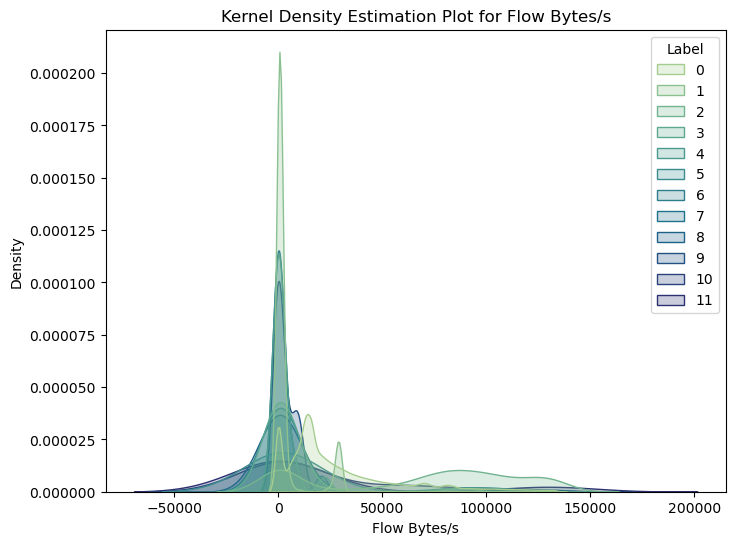

In [14]:
f_data = remove_outliers(data, 'Flow Bytes/s')
plt.figure(figsize=(8, 6))
# Kde plot 
sns.kdeplot(
    data = f_data,
    x = 'Flow Bytes/s', 
    hue = 'Label',
    fill = True,
    common_norm = False,
    palette = 'crest'
)
plt.title(f"Kernel Density Estimation Plot for Flow Bytes/s")

save = True # set false if dont want to save
# Save plot
if save:
    folder_name = 'kde_plots'
    file_name = f'FlowBytes_kde.png'   
    save_plot(folder_name, file_name)

plt.show()

> Density concentrated around 0 with extreme outliers 

Fig saved successfully!


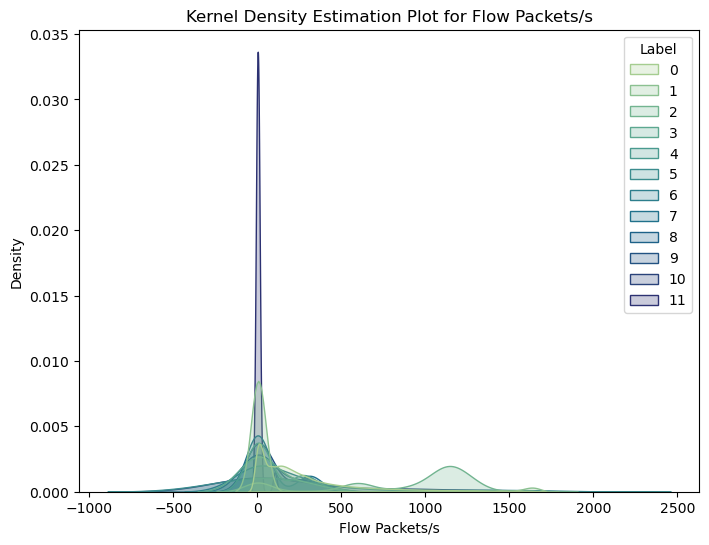

In [18]:
f_data = remove_outliers(data, 'Flow Packets/s')
plt.figure(figsize=(8, 6))
# Kde plot 
sns.kdeplot(
    data = f_data,
    x = 'Flow Packets/s', 
    hue = 'Label',
    fill = True,
    common_norm = False,
    palette = 'crest'
)
plt.title(f"Kernel Density Estimation Plot for Flow Packets/s")

save = True # set false if dont want to save
# Save plot
if save:
    folder_name = 'kde_plots'
    file_name = f'FlowPackets_kde.png'   
    save_plot(folder_name, file_name)

plt.show()